In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
# Load tha data for the pose
poseName = 'Sus-Sous'
loaded = np.load("RootCoordinates/"+poseName+'X.npy')
print("Loaded: ",loaded)
print("Length:", len(loaded))

Loaded:  [[0.506152 0.262977 0.88776  ... 0.514375 0.731506 0.430062]
 [0.501963 0.263005 0.873103 ... 0.510207 0.734391 0.423405]
 [0.500027 0.265633 0.895276 ... 0.510179 0.73696  0.421344]
 ...
 [0.491972 0.295676 0.841173 ... 0.508301 0.715252 0.437651]
 [0.493965 0.295676 0.841101 ... 0.50826  0.717978 0.41625 ]
 [0.495896 0.293066 0.840637 ... 0.512283 0.718186 0.450082]]
Length: 870


870


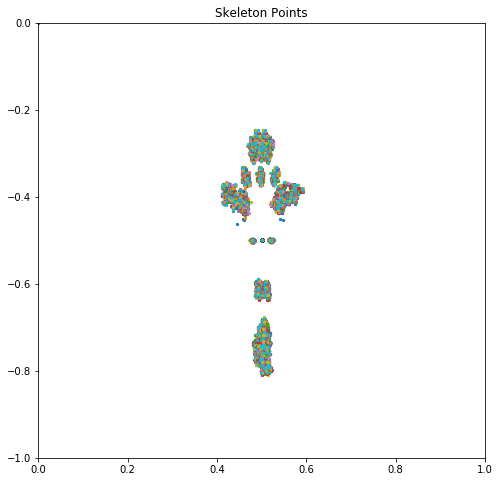

In [3]:
count = 0
def plotCoordinates():
    fig, ax = plt.subplots(1, figsize=(8,8))
    plt.title('Skeleton Points')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global count
    for list in loaded:
        x = list[0::3]
        posY = list[1::3]
        y = [-y for y in posY] #need to make the loaded y values negative for plotting correctly.
        c = list[2::3]
        sc = ax.scatter(x,y,s=5)
        count+=1
plotCoordinates()
print(count)

870


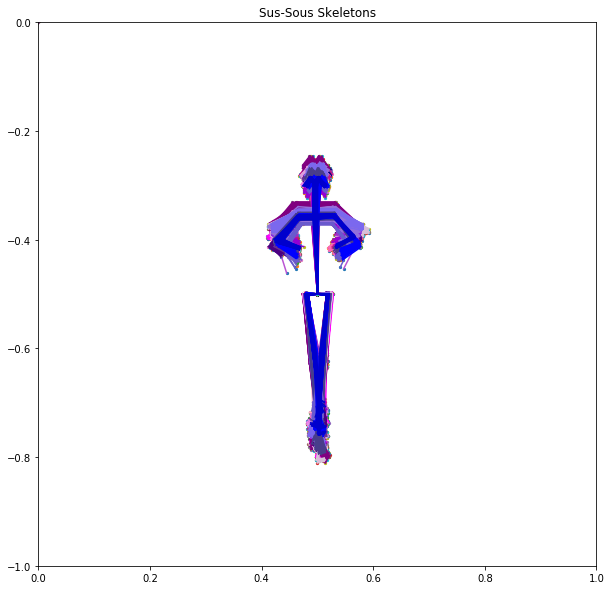

In [4]:
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']

allXList =[]
allYList = []
allCList=[]

dancerNum = 0
count = 0
def plotSkeletons():
    fig,ax = plt.subplots(1,figsize = (10,10))
    plt.title(poseName +' Skeletons')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global dancerNum
    global count
    for list in loaded:
        x = list[0::3]
        allXList.append(x)# all x values per sample
        posY = list[1::3]
        y = [-y for y in posY]# all y values per sample
        allYList.append(y) # the negative values get saved as the mean skeleton.
        c = list[2::3]
        allCList.append(c)# all c values per sample
        sc = ax.scatter(x,y,s=5)
        for bone in bones:
            if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
                continue
                
            ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]],penColor[dancerNum-1])
        count+=1
        if count%30 == 0:
            dancerNum+=1
            #print(dancerNum)
plotSkeletons()
print(count)

In [5]:
#Save the split up lists in XYCSplitListsDirectory
np.save('XYCSplitLists/all'+poseName+'XList.npy', allXList)
np.save('XYCSplitLists/all'+poseName+'YList.npy', allYList)
np.save('XYCSplitLists/all'+poseName+'CList.npy', allCList)

xloaded = np.load('XYCSplitLists/all'+poseName+'XList.npy')
print(xloaded)
yloaded = np.load('XYCSplitLists/all'+poseName+'YList.npy')
print(yloaded)
cloaded = np.load('XYCSplitLists/all'+poseName+'CList.npy')
print(xloaded)

[[0.506152 0.502069 0.469418 ... 0.496009 0.491909 0.514375]
 [0.501963 0.499935 0.467272 ... 0.500009 0.495852 0.510207]
 [0.500027 0.498057 0.46731  ... 0.502076 0.495986 0.510179]
 ...
 [0.491972 0.491958 0.463346 ... 0.502184 0.491978 0.508301]
 [0.493965 0.493946 0.465323 ... 0.504111 0.491894 0.50826 ]
 [0.495896 0.493927 0.467266 ... 0.506152 0.497948 0.512283]]
[[-0.262977 -0.34449  -0.344475 ... -0.761439 -0.753369 -0.731506]
 [-0.263005 -0.342008 -0.344608 ... -0.761537 -0.756165 -0.734391]
 [-0.265633 -0.34468  -0.347212 ... -0.764267 -0.761459 -0.73696 ]
 ...
 [-0.295676 -0.358357 -0.361042 ... -0.745253 -0.742531 -0.715252]
 [-0.295676 -0.358333 -0.358388 ... -0.745249 -0.742553 -0.717978]
 [-0.293066 -0.355721 -0.355735 ... -0.748041 -0.742723 -0.718186]]
[[0.506152 0.502069 0.469418 ... 0.496009 0.491909 0.514375]
 [0.501963 0.499935 0.467272 ... 0.500009 0.495852 0.510207]
 [0.500027 0.498057 0.46731  ... 0.502076 0.495986 0.510179]
 ...
 [0.491972 0.491958 0.463346 ...

In [6]:
# Now calculate mean skeleton:
sumXList = [sum(i) for i in zip(*allXList)]# the * indicates the use of iterables
sumYList = [sum(j) for j in zip(*allYList)]
sumCList =[sum(k) for k in zip(*allCList)]
print(sumXList)
print(sumYList)
print(sumCList)

#Get the average: sum/count - count calculated in cell 2 of this notebook = number of samples.
avgXList = [sx / count for sx in sumXList]
avgYList = [sy / count for sy in sumYList]
avgCList =[sc / count for sc in sumCList]
print(avgXList)
print(avgYList)
print(avgCList)

[433.1617379999997, 433.124683, 404.64163600000006, 369.5581300000004, 396.2517189999999, 461.65650800000014, 497.22659499999986, 470.70179600000046, 435.0, 417.76977800000003, 429.6671769999996, 438.4476149999999, 452.2465799999999, 444.5957810000001, 436.60101900000035, 426.8864169999994, 439.4660529999999, 418.3920270000003, 448.01453099999975, 435.75721299999964, 444.1657699999996, 434.5540750000007, 436.8490669999998, 424.63232699999975, 441.15260699999953]
[-248.55509199999972, -307.3471, -307.67999799999996, -343.8177950000001, -358.5759090000001, -306.4850699999999, -340.7605289999995, -355.35994399999953, -435.0, -435.4116660000001, -532.9135440000008, -622.2258959999995, -434.93077100000016, -534.586949, -635.9701020000002, -241.95057600000027, -241.69338600000003, -253.45547299999976, -252.757749, -665.3857229999998, -663.6660449999991, -646.808441, -655.2224109999993, -644.5083190000007, -631.2694139999999]
[786.8995430000001, 785.9162239999999, 769.9445079999995, 771.04615

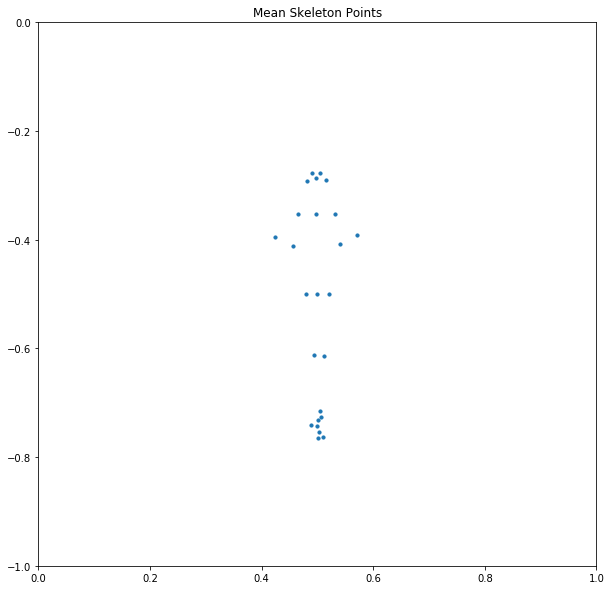

In [7]:
#Plot mean skeleton:
def plotMeanCoordinates():
    fig, ax = plt.subplots(1, figsize=(10,10))
    plt.title('Mean Skeleton Points')
    plt.xlim(0, 1)
    plt.ylim(-1, 0)
    sc = ax.scatter(avgXList,avgYList, s=10)
    #for bone in bones:
        #if avgXList[bone[0]]== 0.0 or avgYList[bone[0]] == 0.0  or avgXList[bone[1]] == 0.0 or avgYList[bone[1]] == 0.0:
            #print("zero values for joint: ",avgXList.index(avgXList[bone[0]]))
            #print("zero values for joint: ",avgXList.index(avgXList[bone[1]]))
        #ax.plot([avgXList[bone[0]],avgXList[bone[1]]],[avgYList[bone[0]],avgYList[bone[1]]])
plotMeanCoordinates()

In [8]:
#calculation of standard deviation values:
import statistics

In [9]:
standardDeviationX = [statistics.stdev(i) for i in zip(*allXList)]
standardDeviationY = [statistics.stdev(i) for i in zip(*allYList)]
standardDeviationC = [statistics.stdev(i) for i in zip(*allCList)]

print("Standard Deviations of X values:",standardDeviationX)
print("Standard Deviations of Y values:",standardDeviationY)
print("Standard Deviations of C values:",standardDeviationC)

Standard Deviations of X values: [0.0030284044220228634, 0.0024806525818163285, 0.0036743866557183468, 0.006921733833131885, 0.008740134914341922, 0.0030968926696172934, 0.006876479657354009, 0.00787520694871686, 0.0, 0.0024917037172309214, 0.0033424037471185774, 0.00396815937152298, 0.0027507746590789204, 0.003347402271929518, 0.0033299495335944456, 0.003780704579250475, 0.0034992638347568694, 0.0034468343676132157, 0.0030873439612106703, 0.0039533876036577575, 0.003948340911612622, 0.0046190248950572, 0.0055031403614949365, 0.05018038556295244, 0.004975637149611042]
Standard Deviations of Y values: [0.01254160343018588, 0.00808184975300385, 0.008120832633793127, 0.011760445081905258, 0.01543923103099604, 0.008046415406596905, 0.010609987651987647, 0.016665009633883662, 0.0, 0.0011452863502056188, 0.009002723024828838, 0.015242320839688713, 0.0009654348047621887, 0.008706683903259885, 0.01825937193306909, 0.012955418432675787, 0.013022113737686601, 0.012069775934717912, 0.012081886899

In [10]:
#plot standard deviation coordinates?
print(len(standardDeviationX))
print(len(avgXList))

25
25


In [11]:
np.save('Stats/'+poseName+'StdDevX.npy', standardDeviationX)
np.save('Stats/'+poseName+'StdDevY.npy', standardDeviationY)
np.save('Stats/'+poseName+'StdDevC.npy', standardDeviationY)
np.save('Stats/'+poseName+'MeanX.npy', avgXList)
np.save('Stats/'+poseName+'MeanY.npy', avgYList)
np.save('Stats/'+poseName+'MeanC.npy', avgCList)